# Least Squares Approximation Proposal

## Motivation

For a general linear system, let matrix $\textbf{A} \in M_{nxm}(R)$ and vector $\vec{b}\in \mathbb{R}^n$, we cannot always guarantee a solution $\vec{x}$ exists such that $\textbf{A}\vec{x} = \vec{b}$. However, is there a solution $\vec{x}$ such that $||\textbf{A}\vec{x}- \vec{b}||$ is as small as possible (i.e. the error/distance between our solution and the truth is as small as possible)? 

Yes, we can guarantee such an optimal solution with Least Squares Approximation.

## Definitions

We will be using the following definitions and notations in our writeup:

- Let $U\subset V$ be a finite dimensional subspace of some vector space V. 
- The Orthogonal Projection of $V$ onto $U$ is the linear transformation:

$$
proj_U: V \rightarrow V
\newline 
\vec{v} \rightarrow \vec{v}^{\parallel}

\newline

\text{where }\vec{v}^{\parallel}\text{ and }\vec{v}-\vec{v}^{\parallel}\in U^{\perp}
$$


## Theorem (1)

Let $U\subset V$ be as defined and $\overrightarrow{v}\in V$ Then,

$$
||\vec{v}-proj_U(\vec{v})|| \leq ||\vec{v}-\vec{u}|| \text{ for all } \vec{u} \in U
$$

Proof:

## Theoerm (2)

This answers our motivational question. The least squares solutions to the linear systerm $\textbf{A}\vec{x} = \vec{b}$ are the solutions to the linear system,

$$
(\textbf{A}^T\textbf{A})\vec{x}=\textbf{A}^T\vec{b}
$$

Proof:

## Application of Least Square Solutions on Real Data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os
import math

Before we begin, we need to preprocess/clean the data which we will not fo over in indepth details.

In [9]:
data = pd.read_csv("./data/train.csv")
data_nona = data.dropna()
data_clean = data_nona.drop(['Date of Joining','Gender','Company Type','WFH Setup Available'], axis=1)
data_clean.head()

,Employee ID,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2.0,3.0,3.8,0.16
1,fffe3700360033003500,1.0,2.0,5.0,0.36
3,fffe32003400380032003900,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2.0,4.0,3.6,0.29


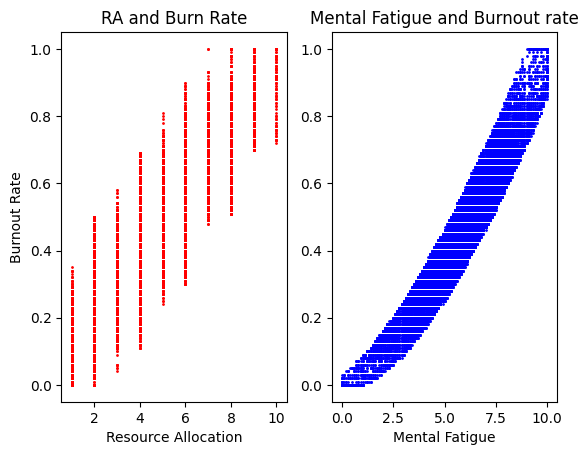

In [25]:
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot subplot 1
ax1.scatter(data_clean["Resource Allocation"], data_clean["Burn Rate"], color='r', s=1)
ax1.set_title('RA and Burn Rate')
ax1.set_xlabel('Resource Allocation')
ax1.set_ylabel('Burnout Rate')

# Plot subplot 2
ax2.scatter(data_clean["Mental Fatigue Score"], data_clean["Burn Rate"], color='b', s=1)
ax2.set_title('Mental Fatigue and Burnout rate')
ax2.set_xlabel('Mental Fatigue')

# Show plot
plt.show()

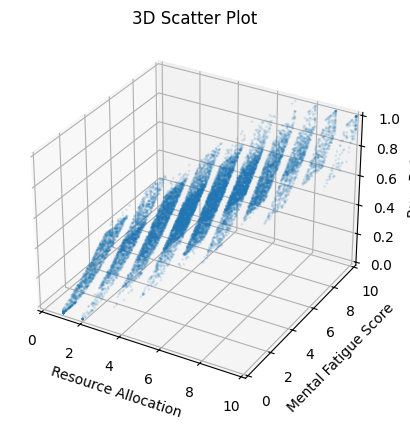

In [37]:
# Create a 3D axis
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot 3D scatter plot
ax.scatter3D(data_clean["Resource Allocation"], data_clean["Mental Fatigue Score"], data_clean["Burn Rate"], s=1, alpha = 0.1)

# Set labels and title
ax.set_xlabel("Resource Allocation")
ax.set_ylabel("Mental Fatigue Score")
ax.set_zlabel("Burn Rate")
ax.set_title('3D Scatter Plot')

# Zoom in by setting limits
ax.set_xlim(0, 10)  # Set limits for the x-axis
ax.set_ylim(0, 10)  # Set limits for the y-axis
ax.set_zlim(0, 1)  # Set limits for the z-axis

# Show plot
plt.show()

The Equation we are trying to solve:

$$
(i) \quad \beta _0 + \beta _1 \times \text{(Resource Allocation)} + \beta _2 \times \text{(Mental Fatigue)} = \text{Burnout Rate} 
$$

Notice the parabolic trend in the plot `Mental Fatigue` against `Burnout Rate`; another posibility is to add a quadratic part into our model,

$$

(ii) \quad \beta _0 + \beta _1 \times \text{(Resource Allocation)} + \beta _2 \times \text{(Mental Fatigue)} + \beta _3 \times \text{(Mental Fatigue)}^2 = \text{Burnout Rate}

$$

Going back to our topic of interest, how does this relate to our notion of least squares solutions?

Notice, for both equations (i) and (ii) we are just interested in finding optimal values for $\beta$'s then writing the equations in matrix notation gives us Theorem (2) from above,

Consider the following definitions,
$$
\overrightarrow{\text{Resource Allocation}} = (x_1, x_2, ... x_n), \quad \overrightarrow{\text{Mental Fatigue}} = (y_1, x_2, ..., y_n), \quad
\overrightarrow{\text{Burn Rate}} = (z_1, z_2, ..., z_n),
$$

then equation (i) is simply (equation (ii) is analogous),
$$
\newline
\textbf{A}\vec{\beta} = \vec{z}
$$

where $\bold{A}$ is the matrix,

$$
\textbf{A} = \begin{pmatrix}
1 & x_1 & y_1\\
1 & x_2 & y_2 \\
\vdots & \vdots & \vdots\\
1 & x_n & y_n
\end{pmatrix}
$$

and $\beta$ is a vector of coefficients (in the case of equation i),

$$
\vec{\beta} = \begin{pmatrix}
\beta _0\\
\beta _1\\
\beta _2
\end{pmatrix}
$$